<a href="https://colab.research.google.com/github/aKhalid1476/ai-skill-showcase/blob/feature%2Fabdullah-khalid/abdullah_khalid_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abdullah Khalid
I am a first year Software Eng student in 1A. Machine Learning is an area that I have only recently been indulged in the world of ML/AI, yet it is quickly becoming my favorite programming area. All the projects that I have completed in ML have only had benefits in terms of revenue, however I want to be part of a project that will have a positive impact on people's lives. And See-DR achieves that purpose.

# Install dependencies

In [10]:
!pip install tensorflow
!pip install scikit-learn.neural_network

ERROR: Could not find a version that satisfies the requirement scikit-learn.neural_network (from versions: none)
ERROR: No matching distribution found for scikit-learn.neural_network


# Preprocess Data

***IMPORTANT*** --> Although the instructions require two images to be loaded, for a CNN to be trained, we need a training set, and then two images from the testing set will be used for the required output.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

cifar10_labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

y_train = y_train.flatten()
y_test = y_test.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


# Normalize data

In [2]:

input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [3]:
print(type(x_train))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Switch labels to one-hot encoding data

In [4]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

# Construct CNN

In [7]:
batch_size = 32
num_classes = 10
epochs = 50

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

# Train CNN

In [8]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - acc: 0.2419 - loss: 2.0514
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.4317 - loss: 1.5546
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.4902 - loss: 1.4162
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.5310 - loss: 1.3102
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.5654 - loss: 1.2168
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.5933 - loss: 1.1444
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.6150 - loss: 1.0846
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.6372 - loss: 1.0395
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.6520 - loss: 0.9879
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.6629 - loss: 0.9615
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.6774 - loss: 0.9251
Epoch 12/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.6845 - loss: 0.9

In [22]:
preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


# Show Model Loss

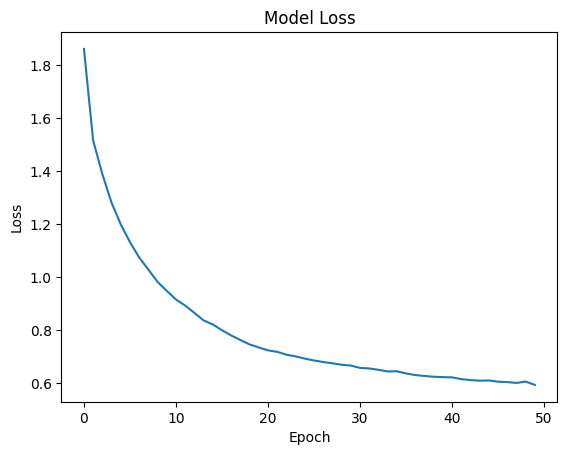

In [9]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Show two images with its true value and the model's predicted value, both images being different ones.

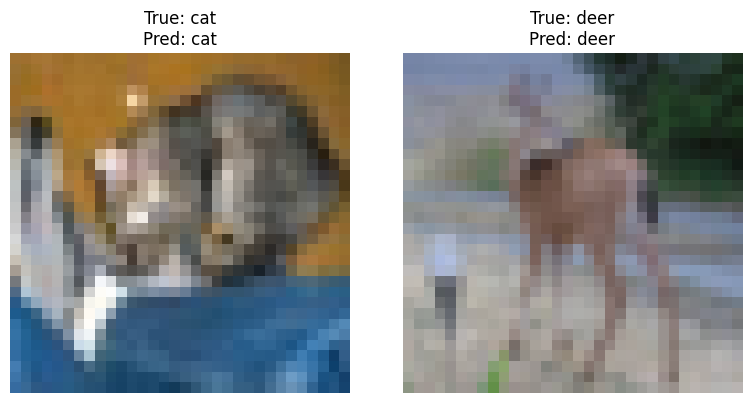

In [25]:
# Get the integer label from the one-hot encoded y_test and the predicted label
y_test_label_1 = tf.argmax(y_test[0], axis=0).numpy()
y_pred_label_1 = tf.argmax(preds[0], axis=0).numpy()

y_test_label_2 = tf.argmax(y_test[100], axis=0).numpy()
y_pred_label_2 = tf.argmax(preds[100], axis=0).numpy()


fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(x_test[0])
axes[0].set_title(f"True: {cifar10_labels[y_test_label_1]}\nPred: {cifar10_labels[y_pred_label_1]}")
axes[0].axis("off")

axes[1].imshow(x_test[100])
axes[1].set_title(f"True: {cifar10_labels[y_test_label_2]}\nPred: {cifar10_labels[y_pred_label_2]}")
axes[1].axis("off")

plt.tight_layout()
plt.show()